In [5]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import pyfpgrowth
import operator

In [6]:
!ls

Human Activity detection
ProgressReport.docx
Project Charter Template - CAPSTONE V4.docx
RTS_data
Report and Document
Untitled.ipynb
node_modules


In [7]:
raw_df=pd.read_excel('RTS_data/Data Dictionary.xlsx')

In [8]:
abs_df=pd.read_excel('/Users/johnny/Desktop/383W/RTS_data/Master_Absence_Data.xlsx').iloc[:,:5]
acc_df=pd.read_excel('/Users/johnny/Desktop/383W/RTS_data/Master_Accident_Data.xlsx')
sdf_df=pd.read_excel('/Users/johnny/Desktop/383W/RTS_data/Master_Scheduled_Days_Off.xlsx')

In [5]:
def get_report(df):
    report_df=pd.DataFrame(columns=df.columns)
    null_list=[]
    for col in report_df.columns:
        null_list.append(len(df[col][df[col].isnull()]))
    report_df.loc['null']=null_list
    return report_df

In [6]:
acc_report=get_report(acc_df).T
acc_report

,null
accdate,0
Operator_ID,0
AccTypeCodeDescr,3
AccSubTypeCodeDescr,5
acctype,15
BAITFISH Code,0
FileNumber,0
AccPreventable,0
Retraining,0
RetrainingDate,748


In [8]:
abs_df.head()

,Absence_Type,Operator_ID,From_Date,From_Time,To_Date
0,Absent,1,2019-03-13,0:00,2019-03-13
1,Absent,1,2019-02-08,0:00,2019-02-08
2,Absent,1,2019-06-10,0:00,2019-06-12
3,Absent,1,2019-06-06,0:00,2019-06-07
4,Absent,1,2019-06-05,0:00,2019-06-05


In [126]:
abs_df.Absence_Type.value_counts()

Excused           14962
Absent             9825
Vacation           4332
Medical            3501
Worked Day Off     2403
Holiday            1110
Late to Work        663
Discipline           86
Name: Absence_Type, dtype: int64

In [127]:
acc_df.head()

,accdate,Operator_ID,AccTypeCodeDescr,AccSubTypeCodeDescr,acctype,BAITFISH Code,FileNumber,AccPreventable,Retraining,RetrainingDate,...,VehNoOccupants,Drv_Age,CoDrvSex,Roadway,RoadwayLightConditions,RoadwayWeather,RoadwaySurface,LocAddr1,Addr_Type,Neighborhood
0,2017-03-15 18:20:00,365,Vehicle Approaching From Angle,Vehicle approaches from right-both straight ac...,03 - MVA with Vehicle,0,17-249,Non-Preventable,N,NaT,...,1.0,47.0,F,Straight and Grade,Daylight,Snow,Snow,2194 N. CLINTON AVE,Address,West Irondequoit
1,2016-05-18 08:27:00,173,Vehicle Passing,Vehicle cuts in and scrapes RGRTA on left side,03 - MVA with Vehicle,0,16-617,Non-Preventable,N,NaT,...,0.0,40.0,M,Straight and Level,Daylight,Clear,Dry,4320 LAKE AVE.,Address,Charlotte
2,2018-09-12 14:09:00,329,Collisions with other motor vehicles,Miscellaneous,03 - MVA with Vehicle,0,18-1082,Non-Preventable,N,NaT,...,NaN,39.0,M,Straight and Level,Daylight,Cloudy,Dry,NaN,NaN,0
3,2019-05-07 15:00:00,276,Vehicle Approaching From Angle,Vehicle approaches from left-vehicle turns-RGR...,03 - MVA with Vehicle,0,19-598,Non-Preventable,N,NaT,...,NaN,41.0,M,Straight with Hillcrest,Daylight,Cloudy,Dry,NaN,NaN,0
4,2015-05-12 07:15:00,42,Passenger On Board Thrown By RGRTA Movement,Other part of equipment-passenger standing or ...,06 - On Board Injury/Incident,0,15-861,Non-Preventable,N,NaT,...,10.0,63.0,M,Straight and Level,Daylight,Clear,Dry,East Dr at Crittenden blvd,Intersection,Strong


In [128]:
len(set(acc_df.Operator_ID))

470

In [129]:
len(acc_df.AccSubTypeCodeDescr.value_counts())

49

In [130]:
sdf_df.iloc[-1]

Effective_On                 2019-07-01 00:00:00
No_Longer_Effective_After    2019-09-02 00:00:00
Pick_Name                                JUN2019
Seniority_Date                        07-01-2019
Operator_ID                                  430
Sun                                          OFF
Mon                                          NaN
Tue                                          NaN
Wed                                          NaN
Thu                                          NaN
Fri                                          NaN
Sat                                          OFF
Type_Work                              PART-TIME
Name: 4579, dtype: object

In [131]:
sdf_df.Type_Work.value_counts()

REGULAR      2509
XB           1233
RELIEF        406
PART-TIME     359
HOLIDAY        73
Name: Type_Work, dtype: int64

In [132]:
acc_df.AccTypeCodeDescr.value_counts()

Collisions with other motor vehicles           325
Collisions w/Fixed Objects                     191
Collisions w/RGRTA vehicles (Bus to Bus)       175
Vehicle Passing                                162
Vehicle Approaching From Angle                  95
Vehicle Following                               84
Collisions w/Other Objects                      82
RGRTA Passing Stationary Vehicle                54
Vehicle Operating Ahead                         29
Thrown by movement of RGRTA stopping            22
Passenger On Board Thrown By RGRTA Movement     17
Pedestrian collision                            16
RGRTA Passing Moving Vehicle                    15
Passenger Injured on board                      11
Non-Collision Incidents                          8
Thrown by movement of RGRTA running              7
Miscellaneous Other                              5
Overhang Collisions                              4
Vehicle Being Met and Passed                     3
Equipment damage or failure    

In [133]:
acc_df.AccSubTypeCodeDescr.value_counts()

Miscellaneous                                                                                        791
Vehicle cuts in and scrapes RGRTA on left side                                                       130
RGRTA slows or stops to load or discharge                                                             51
Fixed object (lamp posts, poles, etc.)                                                                45
RGRTA scrapes motor vehicle standing along right side                                                 34
Vehicle approaches from left-vehicle turns-RGRTA straight                                             24
Vehicle approaches from right-both straight across                                                    23
Passenger seated, being seated or rising from seat                                                    18
Vehicle approaches from left-both straight across                                                     14
Equipment used for repair, construction, or maintenance

In [134]:
acc_df[acc_df.AccPreventable!='Non-Preventable']

,accdate,Operator_ID,AccTypeCodeDescr,AccSubTypeCodeDescr,acctype,BAITFISH Code,FileNumber,AccPreventable,Retraining,RetrainingDate,...,VehNoOccupants,Drv_Age,CoDrvSex,Roadway,RoadwayLightConditions,RoadwayWeather,RoadwaySurface,LocAddr1,Addr_Type,Neighborhood
6,2017-06-20 08:00:00,62,Vehicle Operating Ahead,Vehicle slows or stops for traffic (railroad c...,02 - MVA with Injuries,Front End,17-776,Preventable,Y,2017-09-06,...,30.0,63.0,M,Straight and Level,Daylight,Clear,Dry,West Ave at Chili Ave,Intersection,19th Ward
7,2015-07-15 17:38:00,241,Collisions with other motor vehicles,Miscellaneous,03 - MVA with Vehicle,Turning,15-1148,Preventable,Y,2015-09-30,...,NaN,43.0,M,Straight and Level,Daylight,Clear,Dry,Main Street and South Avenue,Address,South Marketview Heights
8,2016-09-27 15:25:00,345,Collisions with other motor vehicles,Miscellaneous,03 - MVA with Vehicle,Turning,16-1148,Preventable,Y,2016-10-20,...,NaN,54.0,M,Straight and Grade,Daylight,Clear,Dry,Lexington Ave. @ Wren St.,Intersection,Edgerton
9,2017-03-01 10:04:00,361,Collisions w/Fixed Objects,Miscellaneous,03 - MVA with Vehicle,Turning,17-208,Preventable,Y,2017-04-20,...,NaN,47.0,M,Straight and Level,Daylight,Clear,Dry,218 East Main Street,Address,Central Business District
10,2016-02-24 09:58:00,55,Collisions w/Other Objects,"Fixed object (lamp posts, poles, etc.)",04 - MVA with Fixed Object,Fixed Object,16-259,Preventable,Y,2016-03-30,...,3.0,63.0,F,Straight and Level,Daylight,Rain,Wet,1305 Culver Rd.,Address,Beechwood
11,2018-11-26 07:54:00,218,Collisions w/Fixed Objects,Miscellaneous,04 - MVA with Fixed Object,Fixed Object,18-1416,Preventable,Y,2019-01-14,...,2.0,46.0,F,Straight and Level,Daylight,Rain,Wet,NaN,NaN,0
15,2016-03-14 16:52:00,29,Collisions w/RGRTA vehicles (Bus to Bus),Miscellaneous,03 - MVA with Vehicle,General,16-364,Preventable,Y,2016-03-29,...,NaN,47.0,M,NaN,NaN,NaN,NaN,Transit Center South,Address,Central Business District
16,2015-09-05 19:17:00,493,Collisions w/Other Objects,"Equipment used for repair, construction, or ma...",04 - MVA with Fixed Object,General,15-1334,Preventable,Y,2016-01-12,...,NaN,46.0,M,Straight and Level,Other,Clear,Wet,1372 E. Main St.,Address,Beechwood
18,2014-09-14 14:58:00,237,Collisions with other motor vehicles,Miscellaneous,03 - MVA with Vehicle,Encroachment,14-981,Preventable,Y,2014-12-30,...,NaN,49.0,M,Curve and Level,Daylight,Cloudy,Dry,4245 East Avenue,Address,0
19,2016-11-29 16:40:00,184,Collisions with other motor vehicles,Miscellaneous,03 - MVA with Vehicle,Encroachment,16-1453,Preventable,Y,2017-01-10,...,18.0,35.0,M,Straight and Level,Dark,Cloudy,Dry,188 BAY ST.,Address,North Marketview Heights


In [135]:
acc_df.columns

Index(['accdate', 'Operator_ID', 'AccTypeCodeDescr', 'AccSubTypeCodeDescr',
       'acctype', 'BAITFISH Code', 'FileNumber', 'AccPreventable',
       'Retraining', 'RetrainingDate', 'vehbusno', 'vehmake', 'vehyear',
       'VehNoOccupants', 'Drv_Age', 'CoDrvSex', 'Roadway',
       'RoadwayLightConditions', 'RoadwayWeather', 'RoadwaySurface',
       'LocAddr1', 'Addr_Type', 'Neighborhood'],
      dtype='object')

In [136]:
acc_df.Roadway.value_counts()

Straight and Level         783
Straight and Grade         191
Other                       93
Curve and Level             62
Curve and Grade             28
Straight with Hillcrest     22
Curve with Hillcrest        11
None                         3
Name: Roadway, dtype: int64

In [137]:
acc_df.Addr_Type.value_counts()

Address         850
Intersection    189
Rochester         4
NY                1
14611             1
14609             1
14604             1
Name: Addr_Type, dtype: int64

In [138]:
acc_df.vehmake.value_counts()

Gillig             590
New Flyer          570
NE / FL             68
New Flyer XD40      20
NE FL               13
NABI                11
NEW FLYER D40LF      3
GILG                 1
Newfl                1
Name: vehmake, dtype: int64

In [139]:
len(acc_df.Roadway[acc_df.Roadway.isnull()])

121

In [140]:
class treeNode:
    def __init__(self, nameValue, numOccur, parentNode):
        self.name = nameValue
        self.count = numOccur
        self.nodeLink = None
        self.parent = parentNode      #needs to be updated
        self.children = {} 
#increments the count variable with a given amount    
    def inc(self, numOccur):
        self.count += numOccur
#display tree in text. Useful for debugging        
    def disp(self, ind=1):
        print ('  '*ind, self.name, ' ', self.count)
        for child in self.children.values():
            child.disp(ind+1)
            
            
def createTree(dataSet, minSup=1): #create FP-tree from dataset but don't mine
    headerTable = {}
    #go over dataSet twice
    for trans in dataSet:#first pass counts frequency of occurance
        for item in trans:
            headerTable[item] = headerTable.get(item, 0) + dataSet[trans]
    for k in list(headerTable):  #remove items not meeting minSup
        if headerTable[k] < minSup: 
            del(headerTable[k])
    freqItemSet = set(headerTable.keys())
    #print 'freqItemSet: ',freqItemSet
    if len(freqItemSet) == 0: return None, None  #if no items meet min support -->get out
    for k in headerTable:
        headerTable[k] = [headerTable[k], None] #reformat headerTable to use Node link 
    #print 'headerTable: ',headerTable
    retTree = treeNode('Null Set', 1, None) #create tree
    for tranSet, count in dataSet.items():  #go through dataset 2nd time
        localD = {}
        for item in tranSet:  #put transaction items in order
            if item in freqItemSet:
                localD[item] = headerTable[item][0]
        if len(localD) > 0:
            orderedItems = [v[0] for v in sorted(localD.items(), key=lambda p: p[1], reverse=True)]
            updateTree(orderedItems, retTree, headerTable, count)#populate tree with ordered freq itemset
    return retTree, headerTable #return tree and header table


def updateTree(items, inTree, headerTable, count):
    if items[0] in inTree.children:#check if orderedItems[0] in retTree.children
        inTree.children[items[0]].inc(count) #incrament count
    else:   #add items[0] to inTree.children
        inTree.children[items[0]] = treeNode(items[0], count, inTree)
        if headerTable[items[0]][1] == None: #update header table 
            headerTable[items[0]][1] = inTree.children[items[0]]
        else:
            updateHeader(headerTable[items[0]][1], inTree.children[items[0]])
    if len(items) > 1:#call updateTree() with remaining ordered items
        updateTree(items[1::], inTree.children[items[0]], headerTable, count)
        
        
def updateHeader(nodeToTest, targetNode):   #this version does not use recursion
    while (nodeToTest.nodeLink != None):    #Do not use recursion to traverse a linked list!
        nodeToTest = nodeToTest.nodeLink
    nodeToTest.nodeLink = targetNode
    
    
def loadSimpDat():
    simpDat = [['r', 'z', 'h', 'j', 'p'],
               ['z', 'y', 'x', 'w', 'v', 'u', 't', 's'],
               ['z'],
               ['r', 'x', 'n', 'o', 's'],
               ['y', 'r', 'x', 'z', 'q', 't', 'p'],
               ['y', 'z', 'x', 'e', 'q', 's', 't', 'm']]
    return simpDat



def createInitSet(dataSet):
    retDict = {}
    for trans in dataSet:
        retDict[frozenset(trans)] = 1
    return retDict


def ascendTree(leafNode, prefixPath): #ascends from leaf node to root
    if leafNode.parent != None:
        prefixPath.append(leafNode.name)
        ascendTree(leafNode.parent, prefixPath)
        
        
def findPrefixPath(basePat, treeNode): #treeNode comes from header table
    condPats = {}
    while treeNode != None:
        prefixPath = []
        ascendTree(treeNode, prefixPath)
        if len(prefixPath) > 1: 
            condPats[frozenset(prefixPath[1:])] = treeNode.count
        treeNode = treeNode.nodeLink
    return condPats

In [141]:
simpDat = loadSimpDat()

In [142]:
initSet = createInitSet(simpDat)

In [143]:
initSet

{frozenset({'h', 'j', 'p', 'r', 'z'}): 1,
 frozenset({'s', 't', 'u', 'v', 'w', 'x', 'y', 'z'}): 1,
 frozenset({'z'}): 1,
 frozenset({'n', 'o', 'r', 's', 'x'}): 1,
 frozenset({'p', 'q', 'r', 't', 'x', 'y', 'z'}): 1,
 frozenset({'e', 'm', 'q', 's', 't', 'x', 'y', 'z'}): 1}

In [144]:
myFPtree, myHeaderTab = createTree(initSet, 3)
findPrefixPath('z', myHeaderTab['z'][1])

{}

In [145]:
myHeaderTab['z'][1].count

5

In [146]:
findPrefixPath('r', myHeaderTab['r'][1])

{frozenset({'z'}): 1, frozenset({'s', 'x'}): 1, frozenset({'x', 'y', 'z'}): 1}

# Absent CSV

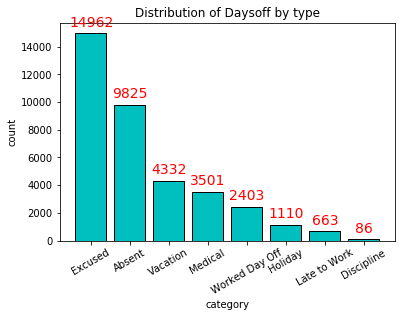

In [150]:


plt.bar(list(abs_df.Absence_Type.value_counts().keys()),abs_df.Absence_Type.value_counts().tolist(),
        color='c',edgecolor='black',width=0.8)
plt.xticks(rotation=30)
for i,x in enumerate(abs_df.Absence_Type.value_counts().tolist()):
    plt.text(i-0.55*len(str(x))/5,x+500,x,size=14,c='red')
plt.ylabel('count')
plt.xlabel('category')
plt.title('Distribution of Daysoff by type')
plt.show()

In [148]:
abs_df.head()

,Absence_Type,Operator_ID,From_Date,From_Time,To_Date
0,Absent,1,2019-03-13,0:00,2019-03-13
1,Absent,1,2019-02-08,0:00,2019-02-08
2,Absent,1,2019-06-10,0:00,2019-06-12
3,Absent,1,2019-06-06,0:00,2019-06-07
4,Absent,1,2019-06-05,0:00,2019-06-05


In [32]:
abs_df.From_Date[0].year

2019

In [33]:
# abs_df.From_Date[0]-abs_df.To_Date[0]
days_off,year=[],[]
sub_absent=abs_df[abs_df.Absence_Type=='Absent']
def subtract_days(x):
    return int(str(x.To_Date-x.From_Date)[0])+1
for i,row in sub_absent.iterrows():
    days_off.append(subtract_days(row))
    year.append(row.From_Date.year)
sub_absent['Days_off']=days_off
sub_absent['year']=year

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [34]:
sub_absent.Days_off.value_counts()

1     8914
2      630
3      158
4       69
5       20
6       11
10       8
7        5
9        5
8        5
Name: Days_off, dtype: int64

In [35]:
def get_df_ovr20pyr(x):
    tdays={}
    temp_df=sub_absent[sub_absent.year==x]
    for day in range(1,11):
        for i,row in temp_df[temp_df.Days_off==day].iterrows():
            if row.Operator_ID in tdays.keys():
                tdays[row.Operator_ID]+=row.Days_off
            else:
                tdays[row.Operator_ID]=row.Days_off
    over_abs={k: v for k, v in sorted(tdays.items(), key=lambda x: x[1]) if v > 20}
    return pd.DataFrame([over_abs.keys(),over_abs.values()],index=['Operator_ID','Days_off']).T

In [36]:
tdays={}
for day in range(1,11):
    for i,row in sub_absent[sub_absent.Days_off==day].iterrows():
        if row.Operator_ID in tdays.keys():
            tdays[row.Operator_ID]+=row.Days_off
        else:
            tdays[row.Operator_ID]=row.Days_off

In [37]:
over_abs={k: v/4 for k, v in sorted(tdays.items(), key=lambda x: x[1]) if v/4 > 20}
pd.DataFrame([over_abs.keys(),over_abs.values()],index=['Operator_ID','Days_off']).T

,Operator_ID,Days_off
0,40.0,22.50
1,252.0,24.25
2,305.0,25.25
3,153.0,26.00


In [38]:
len(get_df_ovr20pyr(2019))

9

In [39]:
len(get_df_ovr20pyr(2018))

12

In [40]:
len(get_df_ovr20pyr(2017))

14

In [41]:
get_df_ovr20pyr(2015)

,Operator_ID,Days_off


In [42]:
len(get_df_ovr20pyr(2016))

8

In [43]:
len(get_df_ovr20pyr(2017))

14

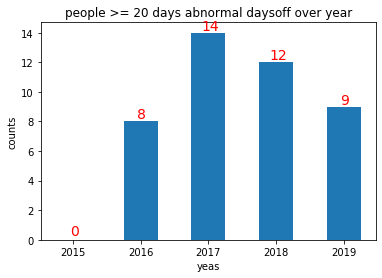

In [153]:
plt.bar(['2015','2016','2017','2018','2019'],[0,8,14,12,9],width=0.5)

plt.text(0-0.05,0.3,0,size=14,c='red')
plt.text(1-0.05,8.2,8,size=14,c='red')
plt.text(2-0.1,14.2,14,size=14,c='red')
plt.text(3-0.1,12.2,12,size=14,c='red')
plt.text(4-0.05,9.2,9,size=14,c='red')
plt.title('people >= 20 days abnormal daysoff over year')
plt.xlabel('yeas')
plt.ylabel('counts')
plt.show()


In [45]:
acc_df[acc_df.Operator_ID==40]

,accdate,Operator_ID,AccTypeCodeDescr,AccSubTypeCodeDescr,acctype,BAITFISH Code,FileNumber,AccPreventable,Retraining,RetrainingDate,...,VehNoOccupants,Drv_Age,CoDrvSex,Roadway,RoadwayLightConditions,RoadwayWeather,RoadwaySurface,LocAddr1,Addr_Type,Neighborhood
734,2018-09-13 09:58:00,40,Collisions with other motor vehicles,Miscellaneous,02 - MVA with Injuries,0,18-1093,Non-Preventable,N,NaT,...,15.0,57.0,F,Straight and Level,Daylight,Clear,Dry,NaN,NaN,0
816,2018-09-25 08:34:00,40,Collisions with other motor vehicles,Miscellaneous,03 - MVA with Vehicle,0,18-1142,Non-Preventable,N,NaT,...,NaN,57.0,F,Straight and Level,Daylight,Rain,Wet,NaN,NaN,0


In [46]:
acc_df[acc_df.Operator_ID==305]

,accdate,Operator_ID,AccTypeCodeDescr,AccSubTypeCodeDescr,acctype,BAITFISH Code,FileNumber,AccPreventable,Retraining,RetrainingDate,...,VehNoOccupants,Drv_Age,CoDrvSex,Roadway,RoadwayLightConditions,RoadwayWeather,RoadwaySurface,LocAddr1,Addr_Type,Neighborhood
156,2018-03-31 11:09:00,305,Passenger Injured on board,Miscellaneous,05 - Boarding or Alighting Injury/Incide,0,18-417,Non-Preventable,N,NaT,...,NaN,47.0,F,Straight and Grade,Daylight,Clear,Dry,N. Clinton Ave. @ Rauber St.,Intersection,Upper Falls
160,2018-09-18 16:36:00,305,Collisions w/Fixed Objects,Miscellaneous,03 - MVA with Vehicle,Fixed Object,18-1115,Preventable,Y,2018-11-05,...,NaN,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,0
1134,2014-10-12 00:40:00,305,Collisions w/RGRTA vehicles (Bus to Bus),Miscellaneous,03 - MVA with Vehicle,Fixed Object,14-1130,Preventable,Y,2015-04-06,...,NaN,43.0,F,NaN,"Dark, but Lighted",Clear,Dry,Lanes 27 & 28,Address,0


In [47]:
acc_df[acc_df.Operator_ID==153]

,accdate,Operator_ID,AccTypeCodeDescr,AccSubTypeCodeDescr,acctype,BAITFISH Code,FileNumber,AccPreventable,Retraining,RetrainingDate,...,VehNoOccupants,Drv_Age,CoDrvSex,Roadway,RoadwayLightConditions,RoadwayWeather,RoadwaySurface,LocAddr1,Addr_Type,Neighborhood
192,2014-12-08 14:53:00,153,RGRTA Passing Stationary Vehicle,RGRTA scrapes motor vehicle standing along rig...,03 - MVA with Vehicle,Fixed Object,14-1359,Preventable,Y,2015-02-05,...,NaN,55.0,F,Straight and Level,Daylight,NaN,NaN,144 College Avenue,Address,Neighborhood of the Arts
641,2017-09-13 16:46:00,153,Collisions with other motor vehicles,Miscellaneous,03 - MVA with Vehicle,Encroachment,17-1214,Preventable,Y,2017-11-06,...,2.0,57.0,F,Straight and Grade,Daylight,Clear,Dry,20 Cleveland Street,Address,Upper Falls
845,2014-12-09 07:50:00,153,Collisions w/Other Objects,"Fixed object (lamp posts, poles, etc.)",04 - MVA with Fixed Object,Fixed Object,14-1360,Preventable,Y,2015-02-05,...,60.0,55.0,F,Straight and Level,Daylight,Cloudy,Dry,Main Street at Prince street,Address,South Marketview Heights
1182,2019-06-03 17:22:00,153,Collisions w/RGRTA vehicles (Bus to Bus),Miscellaneous,03 - MVA with Vehicle,Fixed Object,19-741,Preventable,Y,NaT,...,NaN,59.0,F,Curve and Level,"Dark, but Lighted",Clear,Dry,NaN,NaN,0


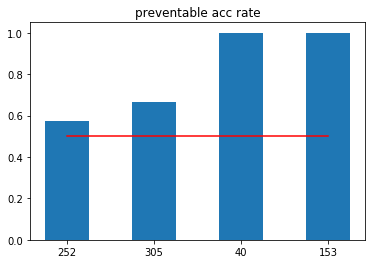

In [48]:
acc_252=acc_df[acc_df.Operator_ID==252].AccPreventable.value_counts()[0]/sum(acc_df[acc_df.Operator_ID==252].AccPreventable.value_counts())
acc_305=acc_df[acc_df.Operator_ID==305].AccPreventable.value_counts()[0]/sum(acc_df[acc_df.Operator_ID==305].AccPreventable.value_counts())
acc_40=acc_df[acc_df.Operator_ID==40].AccPreventable.value_counts()[0]/sum(acc_df[acc_df.Operator_ID==40].AccPreventable.value_counts())
acc_153=acc_df[acc_df.Operator_ID==153].AccPreventable.value_counts()[0]/sum(acc_df[acc_df.Operator_ID==153].AccPreventable.value_counts())


# pd.DataFrame([acc_252,acc_305,acc_40,acc_153],index=[252,305,40,153])
plt.bar(['252','305','40','153'],[acc_252,acc_305,acc_40,acc_153],width=0.5)
plt.title('preventable acc rate')
plt.plot([0.5, 0.5, 0.5, 0.5],c='r')
plt.show()

In [49]:
pd.DataFrame(acc_df[acc_df.Operator_ID.isin([252,305,40,153])].AccTypeCodeDescr.value_counts())

,AccTypeCodeDescr
Collisions with other motor vehicles,4
Collisions w/RGRTA vehicles (Bus to Bus),4
Vehicle Passing,2
Pedestrian collision,1
RGRTA Passing Stationary Vehicle,1
Passenger Injured on board,1
Vehicle Operating Ahead,1
Collisions w/Fixed Objects,1
Collisions w/Other Objects,1


In [154]:
def get_prevent_rate(x):
    try:
        return acc_df[acc_df.Operator_ID==x].AccPreventable.value_counts()['Preventable']/sum(acc_df[acc_df.Operator_ID==x].AccPreventable.value_counts())
    except:
        return 0

prevent_rate={}
for x in set(acc_df.Operator_ID):
    if (x not in prevent_rate.keys()) and (len(acc_df[acc_df.Operator_ID==x])>1):
        temp=get_prevent_rate(x)
        if temp>0.5:
            prevent_rate[x]=get_prevent_rate(x)
        else:
            pass


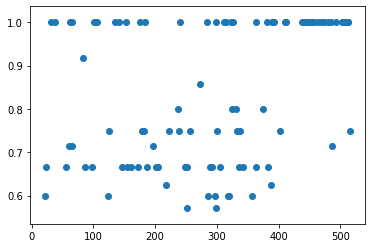

In [155]:
plt.scatter(prevent_rate.keys(),prevent_rate.values())

In [156]:
len(prevent_rate)

98

In [157]:
prevent_rate_array=np.zeros([len(prevent_rate),2])
index=0
for x in list(prevent_rate.keys()):
    prevent_rate_array[index][0]=x
    prevent_rate_array[index][1]=prevent_rate[x]*500
    index+=1

In [158]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='average')
cluster.fit_predict(prevent_rate_array)

array([ 2,  2,  7,  7,  2,  2,  7,  7,  2,  7,  2,  2,  7,  7,  0,  0,  9,
        9,  0,  9,  0,  0,  0,  9,  0,  0,  9,  0,  0,  0,  0,  0,  3,  3,
        3,  1,  8,  8,  8,  3,  3,  1,  8,  8,  8,  8,  8,  1,  4,  8,  1,
        1,  8,  8,  1,  4,  1,  4,  4,  5,  4,  5,  5,  5, 10,  4, 10,  5,
        5, 10, 10,  4, 10, 10,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6, 11,  6,  6,  6,  6,  6,  6,  6,  6, 11])

In [159]:
clutsers_df=pd.DataFrame(prevent_rate_array)
clutsers_df.columns=['ID','rate']
clutsers_df['cluster']=cluster.labels_

In [160]:
clutsers_df.head()

,ID,rate,cluster
0,22.0,300.000000,2
1,23.0,333.333333,2
2,32.0,500.000000,7
3,37.0,500.000000,7
4,56.0,333.333333,2


In [161]:
for x in range(10):
    print(x, ':', len(clutsers_df[clutsers_df.cluster==x]))

0 : 13
1 : 7
2 : 7
3 : 5
4 : 7
5 : 6
6 : 22
7 : 7
8 : 11
9 : 5


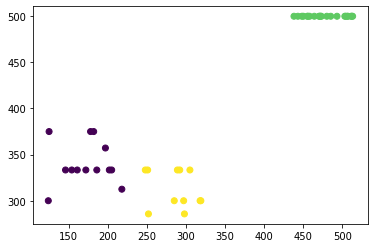

In [162]:
clust=[0,8,6]
plt.scatter(clutsers_df[clutsers_df.cluster.isin(clust)].ID,clutsers_df[clutsers_df.cluster.isin(clust)].rate, c=clutsers_df[clutsers_df.cluster.isin(clust)].cluster)

In [165]:
labels=cluster.labels_
for num in range(len(labels)):
    if labels[num] in [0,8,6]:
        pass
    else:
        labels[num]=1
        

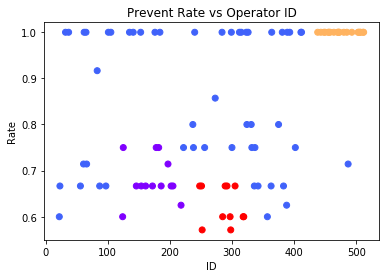

In [176]:
num=96
plt.scatter(prevent_rate_array[:num,0],prevent_rate_array[:num,1], c=cluster.labels_[:num], cmap='rainbow')
plt.yticks([300,350,400,450,500],['0.6','0.7','0.8','0.9','1.0'])
plt.title('Prevent Rate vs Operator ID')
plt.xlabel('ID')
plt.ylabel('Rate')
plt.show()

In [231]:
list(clutsers_df[clutsers_df.cluster==0].ID)

[124.0,
 125.0,
 146.0,
 154.0,
 161.0,
 172.0,
 178.0,
 182.0,
 186.0,
 197.0,
 202.0,
 205.0,
 218.0]

In [232]:
list(clutsers_df[clutsers_df.cluster==8].ID)

[248.0, 251.0, 252.0, 285.0, 289.0, 292.0, 297.0, 298.0, 305.0, 318.0, 319.0]

In [ ]:
list(clutsers_df[clutsers_df.cluster==].ID)

In [52]:
all_prevent=[]
for x in prevent_rate:
    if prevent_rate[x]==1:
        all_prevent.append(x)

In [53]:
acc_df.columns

Index(['accdate', 'Operator_ID', 'AccTypeCodeDescr', 'AccSubTypeCodeDescr',
       'acctype', 'BAITFISH Code', 'FileNumber', 'AccPreventable',
       'Retraining', 'RetrainingDate', 'vehbusno', 'vehmake', 'vehyear',
       'VehNoOccupants', 'Drv_Age', 'CoDrvSex', 'Roadway',
       'RoadwayLightConditions', 'RoadwayWeather', 'RoadwaySurface',
       'LocAddr1', 'Addr_Type', 'Neighborhood'],
      dtype='object')

In [207]:
age_group=[]
gender_group=[]
raod_con=[]
for x in all_prevent:
    age_group.append(max(acc_df[acc_df.Operator_ID==x].Drv_Age))
    gender_group.append(list(acc_df[acc_df.Operator_ID==x].CoDrvSex)[0].lower())

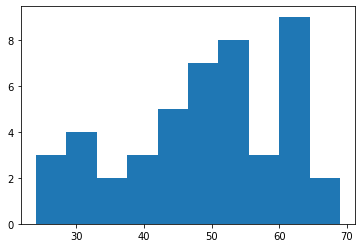

In [208]:

plt.hist(age_group)
plt.show()

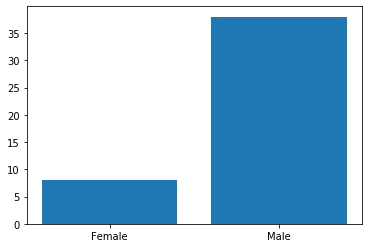

In [223]:
height = [8,38]
bars = ('Female', 'Male')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [0,1]
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


In [227]:
acc_df.RoadwayLightConditions.value_counts()

Daylight             891
Dark, but Lighted    168
Dark                  73
Other                 24
Dusk                  23
Name: RoadwayLightConditions, dtype: int64

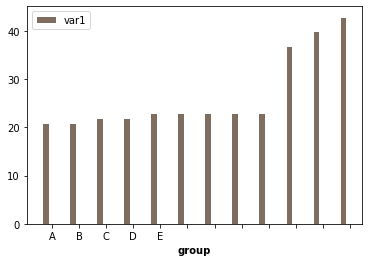

In [151]:
bars1 = list(get_df_ovr20pyr(2018).Days_off)
bars2 = list(get_df_ovr20pyr(2018).Days_off)
bars3 = list(get_df_ovr20pyr(2018).Days_off)
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
# plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [65]:
sub_absent[sub_absent.Days_off==10]

,Absence_Type,Operator_ID,From_Date,From_Time,To_Date,Days_off
5035,Absent,47,2018-06-10,0:00,2018-06-19,10
5668,Absent,48,2018-08-31,0:00,2018-09-09,10
16208,Absent,153,2017-09-18,0:00,2017-09-27,10
16233,Absent,153,2019-08-19,0:00,2019-08-28,10
26332,Absent,248,2017-07-18,0:00,2017-07-27,10
31248,Absent,305,2018-03-21,0:00,2018-03-30,10
31728,Absent,311,2019-08-16,0:00,2019-08-25,10
33071,Absent,330,2019-07-27,0:00,2019-11-03,10


In [66]:
sub_absent[sub_absent.Days_off==9]

,Absence_Type,Operator_ID,From_Date,From_Time,To_Date,Days_off
15547,Absent,146,2017-01-23,0:00,2017-01-31,9
28929,Absent,277,2017-09-30,0:00,2017-10-08,9
30322,Absent,295,2016-04-05,0:00,2016-06-26,9
34807,Absent,361,2017-08-26,0:00,2017-09-03,9
36710,Absent,403,2019-02-23,0:00,2019-03-03,9


In [70]:
sub_absent[sub_absent.Days_off==8]

,Absence_Type,Operator_ID,From_Date,From_Time,To_Date,Days_off
1800,Absent,23,2016-07-31,0:00,2016-08-07,8
3961,Absent,40,2017-10-16,0:00,2017-10-23,8
5036,Absent,47,2018-06-28,0:00,2018-07-05,8
19998,Absent,190,2016-04-25,0:00,2016-05-02,8
35226,Absent,369,2019-01-27,0:00,2019-02-03,8


In [32]:
abs_person=abs_df.groupby(['Operator_ID','Absence_Type']).first()

In [33]:
def over_one(name,list_a):
    count=0
    for x in list_a:
        for n in name:
            if x == n:
                count+=1
    if count>0.5*len(list_a):
        return True
    else: return False


over_one_abs=[]
one_abs=[]
for x in set(abs_df.Operator_ID):
    if len(abs_person.loc[x])>2:
        if over_one(['Absent','Excused','Late to Work'] ,list(abs_person.loc[x].index)):

            over_one_abs.append(x)
        else:
            one_abs.append(x)

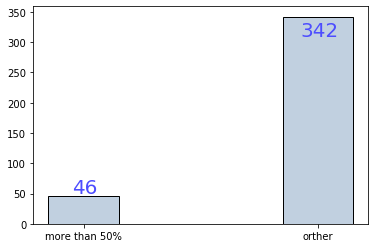

In [34]:
plt.bar(['more than 50%','orther'],[len(over_one_abs),len(one_abs)],width=0.3,color=(0.2, 0.4, 0.6, 0.3),edgecolor='black')
# ,len(one_abs)
plt.text(-0.05,50,'46',size=20,c=(0.3, 0.3, 1, 1))
plt.text(1-0.074,310,'342',size=20,c=(0.3, 0.3, 1, 1))
plt.show()

In [334]:
len(over_one_abs)

46

In [360]:
len(one_abs)

342

In [125]:
import folium
from folium import plugins


mapa = folium.Map([43.1566, -77.6088],zoom_start=10, height=500)
# locations_df = force_clean_df[["LOCATION_LATITUDE", "LOCATION_LONGITUDE"]].copy()
# locations_df = locations_df.iloc[locations_df[['LOCATION_LATITUDE','LOCATION_LONGITUDE']].dropna().index].reset_index(drop=True)
# locations_df["LOCATION_LATITUDE"] = locations_df["LOCATION_LATITUDE"].astype('float')
# locations_df["LOCATION_LONGITUDE"] = locations_df["LOCATION_LONGITUDE"].astype('float')
# locationlist = locations_df.values.tolist()[-2000:]
for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], radius=5, color='red').add_to(mapa)

mapa

In [118]:

# old_loca=[[43.121720,-77.621410],[43.202099,-77.612762],[43.157270,-77.606790],[43.162310,-77.573050],[43.104401,-77.528229]]
for x in locationlist_2:
    locationlist.append(x)
    

In [117]:
locationlist.append( [43.15262, -77.62705])

In [13]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [107]:
from selenium import webdriver
import time
 
driver = webdriver.Chrome('/Users/johnny/Documents/Chrome/chromedriver')
driver.get('https://www.latlong.net')

In [86]:
locationlist=[]
for place in list(acc_df.LocAddr1):
    time.sleep(4)
    if type(place)==str:
        inputElement = driver.find_element_by_xpath('//*[@id="address"]')
        inputElement.send_keys(place+' Rochester')
        submitElement = driver.find_element_by_xpath('//*[@id="btnGetGpsCoordinates"]')
        submitElement.click() 
        inputElement.click()
        inputElement.clear()
        out_lng=driver.find_element_by_id("longitude")
        out_lat=driver.find_element_by_id("latitude")
        try:
            if (float(out_lat.get_attribute("value"))==0) & (float(out_lng.get_attribute("value"))==0):
                pass
            else:
                locationlist.append([float(out_lat.get_attribute("value")),float(out_lng.get_attribute("value"))])
        except:
            pass

KeyboardInterrupt: 

In [110]:
locationlist_2=[]
for place in list(acc_df.LocAddr1[101:]):
    time.sleep(4)
    if type(place)==str:
        inputElement = driver.find_element_by_id('place')
        inputElement.click()
        inputElement.clear()
        inputElement.send_keys(place+' Rochester')
        submitElement = driver.find_element_by_xpath('//*[@id="btnfind"]')
        submitElement.click() 
        
        out_lng=driver.find_element_by_id("lng")
        out_lat=driver.find_element_by_id("lat")
        try:
            if (float(out_lat.get_attribute("value"))==0) & (float(out_lng.get_attribute("value"))==0):
                pass
            else:
                locationlist_2.append([float(out_lat.get_attribute("value")),float(out_lng.get_attribute("value"))])
        except:
            pass

KeyboardInterrupt: 

In [105]:
locationlist_2

[]

In [115]:
locationlist_2[:23]

[[43.19495, -77.62867],
 [43.15798, -77.60894],
 [43.157982, -77.60894],
 [43.13515, -77.60595],
 [43.15798, -77.60894],
 [43.19039, -77.60828],
 [33.87522, -118.40937],
 [43.18073, -77.5988],
 [43.15958, -77.59543],
 [43.14694, -77.62615],
 [43.17607, -77.56789],
 [43.16231, -77.57305],
 [40.8451, -111.17212],
 [43.12347, -77.6185],
 [43.13108, -77.63604],
 [43.16442, -77.65743],
 [43.15715, -77.60642],
 [43.19384, -77.63887],
 [43.21757, -77.59859],
 [51.40089, 0.4709],
 [43.1756, -77.58469],
 [43.24566, -77.61801],
 [43.19383, -77.60009]]